# ADA Milestone 2
# Project Title: Unveiling ingredient combinations

Team members: Yan Fu, Kristijan Lopatichki, Zhechen Su

# Part0 Importing Library

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import re
from os import walk
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [263]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(8,5)})

# Part1 Data Collection and Extraction

Generally, in this part we finished these tasks:

* Scraped over 40,000 web pages out of 93,000 html in `Cooking recipes` dataset, and created csv files with useful information( including title of dishes, nutritions, ingredients, cooking time, cuisine type etc.)

* Cleaned and extracted data from 1.85 GB of `OpenFood.csv` data.

* Downloaded and reconstructed public health .csv files from `WHO` official website.

## 1.1 Dataset1: Cooking recipes

The first dataset is `Cooking recipes`: 2.53 GB of zipped data and concludes more than 93,000 html web pages on recipes. 

1. First we use the first part of the script `move_webpages_to_folders.py` to find out how many unique websites are in `Cooking recipes` and corresponding counts. The result of every html and their website is saved in `TotalHtml2Page.csv`. 

In [6]:
Html2Pages = pd.read_csv('./Input data/TotalHtml2Page.csv')

In [7]:
Html2Pages.head(3)

,website,htmlfile
0,www.drinksmixer.com,5af7259d1ce7d3095ccc9759c085ae17.html
1,www.drinksmixer.com,32cbba91293a8033b95a25b6301dd6a1.html
2,www.cooks.com,9123840613475868b58996e21d4b5095.html


In [8]:
Html2Pages.website.value_counts()

allrecipes.com                23696
www.food.com                  11843
www.foodnetwork.com           10000
www.cooks.com                  5525
www.yummly.com                 4827
www.epicurious.com             4228
www.tasteofhome.com            3787
www.myrecipes.com              3038
recipes.sparkpeople.com        2864
www.cdkitchen.com              2138
southernfood.about.com         2012
www.bettycrocker.com           1921
www.grouprecipes.com           1916
cookeatshare.com               1573
www.recipe.com                 1175
www.ifood.tv                   1137
www.kraftrecipes.com           1122
www.eatingwell.com             1118
www.taste.com.au                980
www.delish.com                  869
simplyrecipes.com               729
homecooking.about.com           607
www.foodandwine.com             532
nullhtml                        529
busycooks.about.com             461
www.recipetips.com              437
www.familyoven.com              406
www.drinksmixer.com         

From the results above, we can notice that we have 119 different webpages where the first three domains contain almost half of the data. To save time, we decide to do web scraping on websites with large enough counts, namely `allrecipes.com`, `food.com`, `foodnetwork.com`, `cooks.com` and `yummly.com`, whose total counts cover 60% html files of the original `Cooking Recipes` dataset.

However, `cooks.com` HTML files contained only search results but not recipes. And `yummly.com` is written in javascript structure and is too difficult to scrap. Instead, we used web scaping on `yummly.com` in real time to obtain more data and parse it easier as will be shown below. Instead we downloaded `yummly` dataset from another [source](http://isia.ict.ac.cn/dataset/Yummly-66K.html), which was crawled from Yummly API.

So next step, we:

2. Decided to extract data from `allrecipes.com`, `food.com`, `foodnetwork.com` and `yummly.com`. Before that we used the seconde part of `move_webpages_to_folders.py` to move corresponding html files to their own folders.
3. Used scripts: `allrecipes_parsing.py`, `food_parsing.py`, `foodnetwork_parsing.py` and `yummly_parsing.py` for web scraping.
4. Generally from each web page we infer information which includes the name of the dish, preparation time, ratings, review counts, type of cuisine, the ingredients, directions for preparation and nutritional facts except in the cases where certain web pages do not contain some of the mentioned data. Saved the result as .csv file.

Notice that the html files in `Cooking recipes` include null pages or search result pages. We discard numerous invalid HTML addresses and redundant data in the datasets and end up with around 27000 recipes in total.As for the last source `yummly.com` we have a subset of around 15166 recipes.

In total, we now have **42286** recipes now.

In [3]:
# Load data from allrecipes.com
allrecipes = pd.read_csv('Input data/allrecipes_df.csv')
allrecipes.drop(columns='Unnamed: 0', inplace=True)

In [4]:
# Load data from food.com
food = pd.read_csv('Input data/food_df.csv')
food.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Load data from foodnetwork.com
foodnetwork = pd.read_csv('Input data/foodnetwork_df.csv')
foodnetwork.drop(columns=['Unnamed: 0'], inplace=True)

In [344]:
# Load data from yummly.com
yummly = pd.read_csv('Input data/yummly-ChFrMx.csv')
yummly.drop(columns=['Unnamed: 0'], inplace=True)

In [349]:
yummly.columns=['Calories', 'Cholesterol_mg', 'Dietaryfiber_g', 'Fat_g',
       'Protein_g', 'Rating', 'Total_Time_min', 'Reviews', 'Sodium_mg',
       'Title', 'Totalcarbs_g', 'id', 'course', 'Cuisine', 'flavors',
       'Ingredients', 'name']

Below we show the information we scraped from internet. 
1. In general, all four dataset include name of dish, review counts, ingredients and cooking time.
2. Nutrition information is lacked in foodnetwork.
3. Rating is lacked in food.
4. Type of cuisine is only available in foodnetwork and yummly, with over 20,000 recipes.

We also noticed there are small percentage of missing values in our data. Following msno module visualized the missing values in our data. To analyze on enough data examples we'd better split our dataset into different categories, eg. nutritrients, ingredients, cooking time and etc.

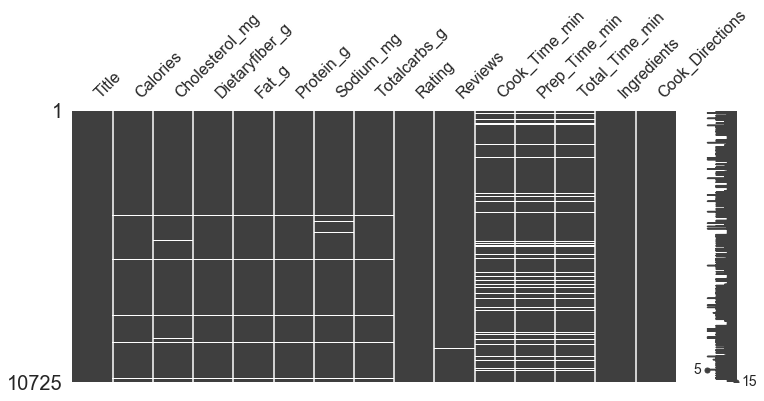

In [270]:
msno.matrix(allrecipes,figsize=(12, 5))#.info()

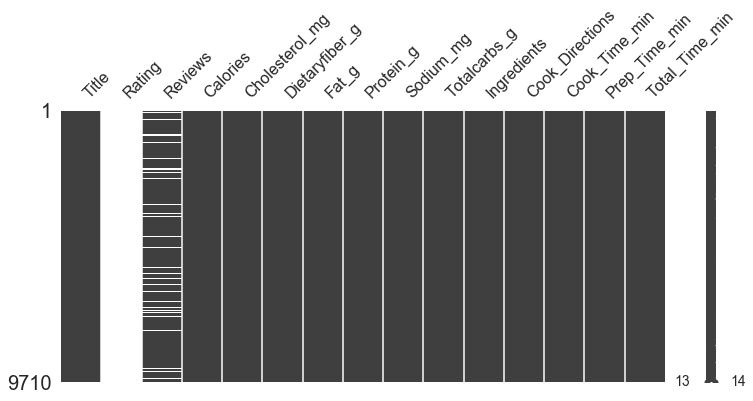

In [271]:
msno.matrix(food,figsize=(12, 5))

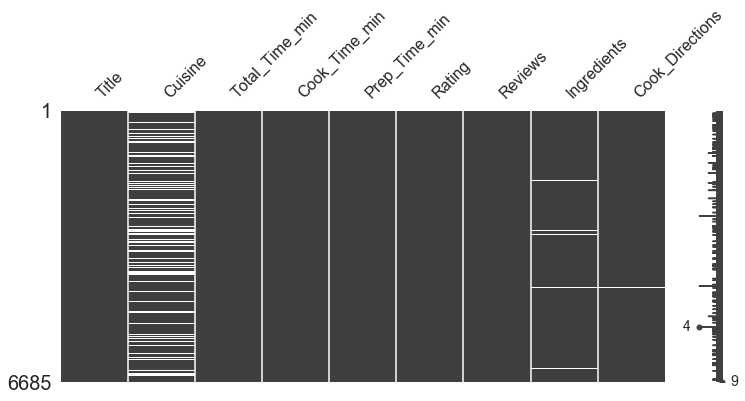

In [272]:
msno.matrix(foodnetwork,figsize=(12, 5))#.info()

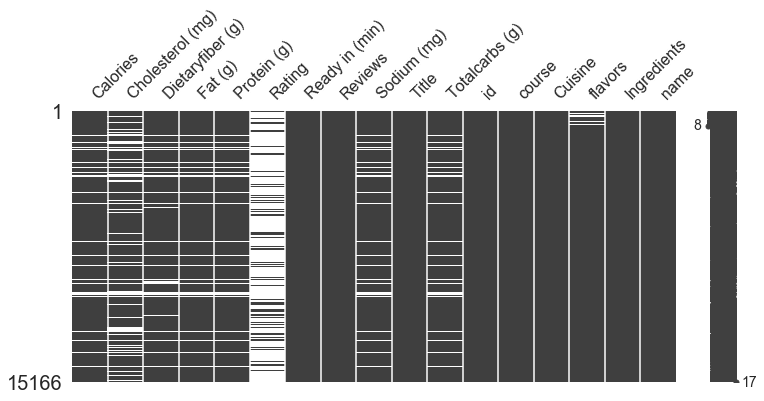

In [297]:
msno.matrix(yummly,figsize=(12, 5))#.info()

## 1.2 Dataset2: OpenFood
Then we continue with `Open food dataset`: 1.6 GB in csv format, containing food product from all over the world.

From the origin `Open food dataset` we extracted product name, country, origins, ingredients and nutrition informations. The total number of food product is **672551**.

Further we will use this dataset to find out where the popular ingredients from `Cooking recipes dataset` are sold, thus trying to figure out regional differences in ingredients.

In [ ]:
openfood = pd.read_csv('./dataset/openfood.csv',sep='\t')
openfood_select = openfood[['product_name','countries_en','origins','ingredients_text',
                            'nutrition_grade_fr','energy_100g','fat_100g','cholesterol_100g','carbohydrates_100g',
                            'sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']]
openfood_notnull = openfood_select[pd.notnull(openfood_select['product_name'])].reset_index().drop(columns='index')
openfood_notnull = openfood_notnull[pd.notnull(openfood_notnull['countries_en'])].reset_index().drop(columns='index')
openfood_notnull.to_csv('./Input data/OpenFoodCleaned.csv',index=False)

In [12]:
openfood = pd.read_csv('./Input data/OpenFoodCleaned.csv')

In [13]:
openfood.count()

product_name          672551
countries_en          672551
origins                42459
ingredients_text      392550
nutrition_grade_fr    140963
energy_100g           592770
fat_100g              587457
cholesterol_100g      144495
carbohydrates_100g    587197
sugars_100g           577017
fiber_100g            272255
proteins_100g         591390
salt_100g             571944
sodium_100g           571916
dtype: int64

## 1.3 Dataset3: WHO public health

Regarding our last question we include dataset WHO where we can go even further to analyze the possible relationship between regional recipes or favored ingredients and public health.

In this part we are working on the WHO dataset downloaded from WHO website. And the data including ratio of country population on :
1. high blood pressure(blood pressure over SBP140)
2. cholesterol on two levels(190mg/dl for a little bit high and 240mg/dl for very high cholesterol)
3. BMI(BMI>25 for overweight and BMI>30 for obesity) 
4. death rate of noncommunicable diseases(including heart disease, stroke, cancer, diabetes and chronic lung disease). 

And we choose statistics data in the same year as possible.

The output data is in aggregation of risk factors and sex by **195** countries, intended to estimate regional specific public health condition. And the ratio is calculated after age-standardized (per 100 000 population). Age standardization is used to allow populations to be compared when the age profiles of the populations are quite different.


In [14]:
FILE_FOLDER = './dataset/WHO/'
BP_2015 = pd.read_csv(FILE_FOLDER+'BloodPressureSBP140.csv',skiprows=3).iloc[:,0:4] #blood pressure
NCD = pd.read_csv(FILE_FOLDER+'NoncommunicableDiseasesByCountry.csv',skiprows=2).iloc[:,0:5] # noncommunicable disease
NCD_2015 = NCD.loc[NCD.Year==2015].copy().reset_index().drop(columns=['Year','index'])

In [15]:
idx = [0,3,4,5]
Chol_2008_190 = pd.read_csv(FILE_FOLDER+'Cholesterol190ByCountry.csv',skiprows=1).iloc[:,idx]
Chol_2008_240 = pd.read_csv(FILE_FOLDER+'Cholesterol240ByCountry.csv',skiprows=1).iloc[:,idx]
Chol = pd.merge(Chol_2008_240,Chol_2008_190,how='outer',on='Country',suffixes=('_chol240','_chol190'))#cholesterol
idx = [0,4,5,6]

In [16]:
BMI_2015_25 = pd.read_csv(FILE_FOLDER+'NCD_BMI_25A.csv',skiprows=3).iloc[:,idx]
BMI_2015_25.columns=['Country','Both sexes','Male','Female']
BMI_2015_30 = pd.read_csv(FILE_FOLDER+'NCD_BMI_30A.csv',skiprows=3).iloc[:,idx]
BMI_2015_30.columns=['Country','Both sexes','Male','Female']
BMI = pd.merge(BMI_2015_25,BMI_2015_30,how='outer',on='Country',suffixes=('_BMI25','_BMI30'))#BMI

In [17]:
tmp1 = pd.merge(Chol,BMI,how='outer',on='Country',suffixes=('',''))
tmp2 = pd.merge(NCD_2015,BP_2015,how='outer',on='Country',suffixes=('_NCD','_BP'))
WHOdata = pd.merge(tmp1,tmp2,how='outer',on='Country',suffixes=('',''))
WHOdata.to_csv('./SavedList/WHOdata.csv')
WHOdata.head(2)

,Country,Both sexes_chol240,Male_chol240,Female_chol240,Both sexes_chol190,Male_chol190,Female_chol190,Both sexes_BMI25,Male_BMI25,Female_BMI25,Both sexes_BMI30,Male_BMI30,Female_BMI30,Both sexes_NCD,Male_NCD,Female_NCD,Both sexes_BP,Male_BP,Female_BP
0,Afghanistan,4.0 [1.7-8.1],3.5 [1.0-8.3],4.5 [1.2-11.6],21.9 [11.0-36.5],20.9 [7.5-40.1],22.8 [7.6-46.1],22.3 [18.1-27.0],19.1 [13.2-26.2],25.4 [19.7-32.0],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],848.6,902.3,801.4,30.6 [23.6-38.3],30.4 [20.4-41.6],30.7 [21.2-41.3]
1,Albania,12.0 [5.9-21.1],11.3 [4.2-23.5],12.6 [4.0-27.4],45.3 [29.8-61.0],46.3 [25.2-68.0],44.3 [21.6-67.2],57.0 [52.2-61.6],63.6 [56.8-69.9],50.5 [43.9-57.2],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],569.5,664.8,483.6,29.0 [22.4-36.2],33.0 [23.0-44.3],25.0 [16.8-34.7]


# Part2: Data process and analysis

## 2.1 Ingredients & Cuisines

For the second question we can identify the key ingredients for different recipes by counting frequency. The main ideas are:

1. Dropping words which are not ingredients in the 'Ingredients' column.
2. Counting the frequency of ingredients and getting the most popular ingredients for different cuisines.
3. Finding ingredient pairs (eg. ingredients always come up together).

In [306]:
cuisine = pd.concat([foodnetwork.iloc[:,[0,1]].copy(),yummly.iloc[:,[9,13]].copy()],sort=False)
cuisine.dropna(how='any',inplace=True)
cuisine.set_index('Title', inplace=True)

In [335]:
cuisine.count()

Cuisine    20015
dtype: int64

In [308]:
cuisine.Cuisine.value_counts()

French           5741
Chinese          4751
Mexican          4703
American         2955
European         1059
Asian             283
Latin             191
Middle             86
Caribbean          70
Italian            54
Jewish             28
African            24
Mediterranean      14
British            10
Californian         8
South               7
Eastern             7
Japanese            4
Indian              3
with                3
Canadian            2
Greek               2
Irish               2
Scandinavian        2
Spanish             2
Thai                1
Hawaiian            1
Portuguese          1
German              1
Name: Cuisine, dtype: int64

We can see our current dataset focused mostly on French, Chinese, Mexican and American food. 

In [274]:
ingredients_raw = pd.concat([allrecipes.iloc[:,[0,13]].copy(),food.iloc[:,[0,10]].copy(),
                     foodnetwork.iloc[:,[0,7]].copy(),yummly.iloc[:,[9,15]].copy()],sort=False)
ingredients_raw.drop_duplicates('Title', inplace=True)
ingredients_raw.set_index('Title', inplace=True)
ingredients_raw.dropna(how='all', inplace=True)

In [275]:
words=[]
for i in range(len(ingredients_raw.Ingredients)):
    words += list(filter(None, re.findall("[A-Za-z]*", str(ingredients_raw.Ingredients[i]))))
words_df = pd.DataFrame(words, columns=['Words'])
words_df.Words.value_counts().head(10)

cup            57683
teaspoon       36113
tablespoons    24293
cups           22816
salt           22675
chopped        21966
pepper         21641
oil            18227
sugar          17880
ground         16553
Name: Words, dtype: int64

In [277]:
words_df.Words.count()

1259659

In [276]:
np.where(word_cnt>200)[0].shape

(626,)

Above we counted the word frequency in ingredients and found that there were many non-ingredients words. And most of the words had low frequency (only 626 words out of 1,259,659 appeared more than 200 times). So we selected non-ingredient words manually from top 700 words in words_df, and saved them in a drop list.

The criteria to select non-ingredient words can be categorized into several parts:
* Numeral: 

    eg. one, two, three, four, five, six, seven, eight, nine and ten etc.


* Quantifier: 

     eg. cup, tespoon, ounce, pound, inch, gram, half, chunk, bottle, pint, quart, gram, lb, oz and their plural form.
     
     
* Food pre-processing:

    eg. peeled, melted, mixed, mashed, cracked, squeezed, deveined, evaporated, washed etc.
    
    
* Preposition:

    eg. or, for, and, to, if and etc.


* Other non-relevant words:

    eg. thick, less, part, container and etc.

In [278]:
drop_list = ['cup','teaspoon','tablespoons','cups','and','or','g','kg','ounce','tablespoon','teaspoons','to','sliced','minced',
'ounces','diced','cut','into','pound','pounds','for','inch','inches','of','freshly','finely','whole','dry',
'optional','in','piece','pieces','lb','lbs,''slice','slices','about','melted','skinless','boneless','hot','with',
'can','cans','a','as','rinsed','thick','cold','thawed','halves','at','if','on','tsp','pitted','Pinch','chunks','five',
'from','frying','you','your','smoked','juiced','tbsp','mixed','needed','serving','container','oz','blend','size',
'pint','boiling','sifted','quart','quarts','lengthwise','other','cracked','mashed','pan','bottle','bottles','squeezed',
'deveined','evaporated','de','is','washed','very','well','ml','like','it','degrees','dice','rolls','any','bag','used',
'chops','flaked','refried','reserved','chilled','rolled','split','by','only','julienned','piece','chuck','but','grams',
'unsalted','salted','less','drops','quality','refrigerated','Old','be','slivered','unbleached','inches',
'semi','F','old','part','up','loaf','peel','boiled','desired','approximately','Fresh','fresh','squares','baked','slightly',
'stemmed','blanched','undrained','choice','top','ring','rings','filling','distilled','rounds','unpeeled','peeled','slice','sprig',
'Chopped','C','I','borken','scrubbed','deep','Tbs','t','e','self','cooled','rising','rind','soaked','this','stewed',
            'cooked','taste','jar','quartered','marinated','liquid','chopped','softened','baking',
            'one','two','three','four','five','six','seven','eight','nine','ten']

In [279]:
ing_dict = {}
for i in range(len(ingredients_raw.Ingredients)):
    ing_split = ingredients_raw.Ingredients[i].split(',')
    ing_list = []
    for j in range(len(ing_split)):
        tmp = list(filter(None,re.findall("[A-Za-z]*", str(ing_split[j]))))
        ing = ' '.join([x for x in tmp if x not in drop_list])
        ing_list.append(ing)
    ing_dict[ingredients.index[i]] = ','.join(list(filter(None,ing_list)))

In [280]:
split_ingred = pd.DataFrame.from_dict([ing_dict]).T.reset_index()
split_ingred.columns = ['Title','SplitIngredients']
split_ingred.head(2)

,Title,SplitIngredients
0,GREEN CHILE SWEET POTATO TACOS,"sweet potatoes,fire roasted green chiles half ..."
1,Mexican Street Corn Salad With Black Beans an...,"mayonnaise,ground chipotle chile pepper,garlic..."


In [286]:
ingredients = pd.merge(ingredients_raw,split_ingred,how='inner',on='Title')
ingredients.to_csv('./Input data/ingredients.csv',index=False)
ingredients.head(2)

,Title,Ingredients,SplitIngredients
0,Baked Buffalo Wings,"['3/4 cup all-purpose flour', '1/2 teaspoon ca...","all purpose flour,cayenne pepper,garlic powder..."
1,Fast Rice Pudding,"['2 cups cooked white rice', '1 tablespoon gro...","white rice,ground cinnamon,milk,white sugar"


In [309]:
cuisine_ingr = pd.merge(ingredients,cuisine,how='inner',on='Title')

In [325]:
French = cuisine_ingr.loc[cuisine_ingr.Cuisine=='French'].copy().reset_index()
Chinese = cuisine_ingr.loc[cuisine_ingr.Cuisine=='Chinese'].copy().reset_index()
Mexican = cuisine_ingr.loc[cuisine_ingr.Cuisine=='Mexican'].copy().reset_index()
American = cuisine_ingr.loc[cuisine_ingr.Cuisine=='American'].copy().reset_index()

In [328]:
# counting frequency of certain cuisine type
df = French
Fr_words=[]
for i in range(len(df.SplitIngredients)):
    Fr_words += df.SplitIngredients[i].split(',')
words_df_ = pd.DataFrame(Fr_words, columns=['Words'])
words_df_.Words.value_counts().head(10)

butter               2631
salt                 2120
milk                 1351
eggs                 1303
sugar                1292
all purpose flour     857
olive oil             841
water                 820
vanilla extract       774
large eggs            715
Name: Words, dtype: int64

In [332]:
df = Chinese
Ch_words=[]
for i in range(len(df.SplitIngredients)):
    Ch_words += df.SplitIngredients[i].split(',')
words_df_ = pd.DataFrame(Ch_words, columns=['Words'])
words_df_.Words.value_counts().head(10)

soy sauce        2348
ginger           1971
garlic           1693
sesame oil       1676
salt             1606
water            1398
corn starch      1353
sugar            1344
green onions     1164
vegetable oil    1123
Name: Words, dtype: int64

In [333]:
df = Mexican
Mex_words=[]
for i in range(len(df.SplitIngredients)):
    Mex_words += df.SplitIngredients[i].split(',')
words_df_ = pd.DataFrame(Mex_words, columns=['Words'])
words_df_.Words.value_counts().head(10)

cilantro        2244
salt            1868
avocado         1218
garlic          1092
lime            1075
tomatoes        1075
chili powder    1067
olive oil        937
black beans      908
ground cumin     893
Name: Words, dtype: int64

In [334]:
df = American
Am_words=[]
for i in range(len(df.SplitIngredients)):
    Am_words += df.SplitIngredients[i].split(',')
words_df_ = pd.DataFrame(Am_words, columns=['Words'])
words_df_.Words.value_counts().head(10)

salt                   991
butter                 876
sugar                  606
recipe follows         597
all purpose flour      529
water                  416
ground black pepper    400
olive oil              378
milk                   355
kosher salt            339
Name: Words, dtype: int64

From above we can observe interesting differences in regional cuisine. Salt, water and sugar seem to be the most common ingredients in all cuisines. And Chinese cuisine differs a lot in the use of soy sauce, ginger, sesame oil, corn starch and vegetable oil. Mexican cuisine uses cilantro, avocado, chili powder and ground cumin. For French and American cuisine, they have much in common like the use of olive oil, butter and all purpose flour but French stands out itself with vanilla extract.

All these results are interesting and have strong regional feature.

## 2.2 Nutritients

We start with creating `Nutritients` category which will provide us with nutritional information for every recipe available. Since we have nutritional information from `allrecipes.com`, `food.com` and `yummly.com` we create our dataframe from these dataframes.

In [351]:
nutrients = pd.concat([allrecipes.iloc[:,0:8],food.iloc[:,[0,3,4,5,6,7,8,9]].copy(),yummly.iloc[:,[9,0,1,2,3,4,8,10]].copy()],sort=False)
nutrients.set_index('Title', inplace=True)
nutrients.dropna(how='all', inplace=True)
nutrients.head(2)

,Calories,Cholesterol_mg,Dietaryfiber_g,Fat_g,Protein_g,Sodium_mg,Totalcarbs_g
Title,,,,,,,
Baked Buffalo Wings,125.0,32.0,0.2,9.2,6.8,258.0,3.8
Fast Rice Pudding,424.0,33.0,1.6,8.9,10.6,121.0,76.2


In this part we focused on if a dish is healthy or not by its nutritient information. 
Daily intake:
calories: 2000
cholesterol: 300mg
fiber: 20-40g
fat: 44-77g
protein: 46-56g
sodium: 2300mg
carbohydrate: 325g(normal) 150(lose weight)

In [76]:
Calo = nutrients.loc[nutrients.Calories>=2000].index.drop_duplicates().get_values()

In [77]:
Chole = nutrients.loc[nutrients.Cholesterol_mg>=300].index.drop_duplicates().get_values()

In [78]:
Fiber = nutrients.loc[(nutrients.Dietaryfiber_g>40)].index.drop_duplicates().get_values()

In [79]:
Fat = nutrients.loc[(nutrients.Fat_g>77)].index.drop_duplicates().get_values()

In [80]:
Protein = nutrients.loc[nutrients.Protein_g>56].index.drop_duplicates().get_values()

In [81]:
Sodium = nutrients.loc[nutrients.Sodium_mg>2300].index.drop_duplicates().get_values()

In [82]:
Carb = nutrients.loc[nutrients.Totalcarbs_g>150].index.drop_duplicates().get_values()

In [83]:
nutri_title = [Calo,Chole,Fiber,Fat,Protein,Sodium,Carb]

In [84]:
flattened_list = [y for x in nutri_title for y in x]

In [86]:
pd_list = pd.DataFrame(flattened_list)
pd_list.columns=['Title']
unhealthy = pd_list.Title.value_counts()

In [106]:
unhealthy

Dawn's Amish Friendship Cake With Starters           7
Lemon Kiss Cookies                                   7
Italian Meatballs                                    7
Baked Mashed Potatoes                                7
Sweet Potato Mousse With Gooey Praline Sauce         7
Chocolate Tres Leches Cake                           7
Wendy's Frosty                                       7
Quinoa Banana Bread, Regular or Sugar Free           7
Navy Bean Pie (Muslim)                               7
Pao De Mel (portuguese Honey Bread)                  6
Chocolate Fudge Sheet Cake                           6
Cinnamon Roll Cake                                   6
White Holiday Punch                                  6
Gluten-Free Sourdough Bread                          6
Coconut-Pineapple Cake With Cream Cheese Frosting    6
Cinnabon - Like Cinnamon Rolls                       6
Ivar's Clam Chowder                                  6
Hershey's Chocolate Cake With Frosting               6
Ricotta Po

In [108]:
unhealthy.index[0:52]

Index(['Dawn's Amish Friendship Cake With Starters', 'Lemon Kiss Cookies',
       'Italian Meatballs', 'Baked Mashed Potatoes',
       'Sweet Potato Mousse With Gooey Praline Sauce',
       'Chocolate Tres Leches Cake', 'Wendy's Frosty',
       'Quinoa Banana Bread, Regular or Sugar Free', 'Navy Bean Pie (Muslim)',
       'Pao De Mel (portuguese Honey Bread)', 'Chocolate Fudge Sheet Cake',
       'Cinnamon Roll Cake', 'White Holiday Punch',
       'Gluten-Free Sourdough Bread',
       'Coconut-Pineapple Cake With Cream Cheese Frosting',
       'Cinnabon - Like Cinnamon Rolls', 'Ivar's Clam Chowder',
       'Hershey's Chocolate Cake With Frosting', 'Ricotta Pound Cake',
       'Baked Shrimp in Italian Dressing', 'Boston Cream Cheesecake',
       'Chicken Fried Rice', 'Peanut Butter Tandy Cake', 'Yum Yum Bars',
       'Southern Living's Cream Cheese Pound Cake', 'Southern Lady Cake',
       'Chargrilled Oysters Acme Oyster House Style',
       'Povitica Polish Holiday bread', 'The Best R

In [109]:
np.where(unhealthy>5)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

Now let's check our new dataframe containing nutritional information for the recipes. We dropped the recipes where all nutriens were unknown, so we expect the missing values to be reasonable. 

In [23]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27042 entries, Baked Buffalo Wings to Crab Dip
Data columns (total 7 columns):
Calories          27037 non-null float64
Cholesterol_mg    25775 non-null float64
Dietaryfiber_g    26838 non-null float64
Fat_g             27041 non-null float64
Protein_g         27028 non-null float64
Sodium_mg         26955 non-null float64
Totalcarbs_g      27012 non-null float64
dtypes: float64(7)
memory usage: 1.7+ MB


## 2.3 Rating

We have 28021 total recipes for these three webpages and here we got 27042 recipes containing nutritional information after droping recipes where all nutrients are unknown. Also, we can notice that indeed we have very small percentage of missing values of up to 5% which is acceptable.

Next we will create a new `Ratings` category containing information about ratings for every recipe available. Since we have ratings information from `allrecipes.com`, `foodnetwork.com` and `yummly.com` we create our dataframe from these dataframes.

In [24]:
ratings = pd.concat([allrecipes.iloc[:,[0,8]].copy(),foodnetwork.iloc[:,[0,5]].copy(),yummly.iloc[:,[9,5]].copy()])
ratings.set_index('Title', inplace=True)
ratings.dropna(how='all', inplace=True)

In [25]:
ratings.head(3)

,Rating
Title,
Baked Buffalo Wings,4.4
Fast Rice Pudding,4.1
Chicken Breast Cutlets with Artichokes and Capers,4.4


Here we have 18852 ratings for recipes out of 24996 available.

Next we will create a new `Reviews` category containing information about number of reviews for every recipe available. We have reviews information from every webpage datafreme available.

In [26]:
reviews = pd.concat([allrecipes.iloc[:,[0,9]].copy(),food.iloc[:,[0,2]].copy(),
                     foodnetwork.iloc[:,[0,6]].copy(),yummly.iloc[:,[9,7]].copy()])
reviews.set_index('Title', inplace=True)
reviews.dropna(how='all', inplace=True)

In [27]:
reviews.head(3)

,Reviews
Title,
Baked Buffalo Wings,519.0
Fast Rice Pudding,75.0
Chicken Breast Cutlets with Artichokes and Capers,80.0


Here we lose a small amount of data and we have 33447 reviews for recipes out of 34706.

Next we will create a new `Total cooking time` category containing information about the total time needed to make the recipe for every recipe available. We have total cooking time information from every webpage datafreme available.

In [28]:
total_cook_time = pd.concat([allrecipes.iloc[:,[0,12]].copy(),food.iloc[:,[0,14]].copy(),
                     foodnetwork.iloc[:,[0,2]].copy(),yummly.iloc[:,[9,6]].copy()])
total_cook_time.set_index('Title', inplace=True)
total_cook_time.dropna(how='all', inplace=True)

In [29]:
total_cook_time.head(3)

,Total_Time_min
Title,
Baked Buffalo Wings,120.0
Fast Rice Pudding,15.0
Chicken Breast Cutlets with Artichokes and Capers,40.0


Here we lose a small amount of data as before and we have 33024 entries of total time needed for cooking in minutes out of 34706.

Next we will create a new `Ingredients` category containing information about the ingredients needed to make the recipe for every recipe available. We have the ingredients information from every webpage datafreme available.

Here we lose a small amount of data as before and we have 34609 entries for ingredients out of 34706.

Next we will create a new `Cooking Directions` category containing information about the directions needed to make the recipe for every recipe available. Since we have ratings information from `allrecipes.com`, `foodk.com` and `foodnetwork.com` we create our dataframe from these dataframes.

In [32]:
cook_directions = pd.concat([allrecipes.iloc[:,[0,14]].copy(),food.iloc[:,[0,11]].copy(), foodnetwork.iloc[:,[0,8]].copy()])
cook_directions.set_index('Title', inplace=True)
cook_directions.dropna(how='all', inplace=True)

In [33]:
cook_directions.head(3)

,Cook_Directions
Title,
Baked Buffalo Wings,"['Line a baking sheet with aluminum foil, and ..."
Fast Rice Pudding,"['Combine the rice, cinnamon, milk, and sugar ..."
Chicken Breast Cutlets with Artichokes and Capers,"['Combine flour, salt, and white and black pep..."


Here we lose a small amount of data as before and we have 27104 entries for ingredients out of 27120.

Now we have our main dataframes to start our analysis and see how we can use them to answer our questions towards the data story. 

We will start by looking into the first question:
What are the most popular recipes? Do popular cuisines have special preference on cooking method, ingredients or preparation time?

From our dataframes for ratings and reviews we can try to determine which are the most popular recipes. We will sort the recipes by the number of reviews and check the score of the ratings to see if the top recipes have positive or negative reviews (by a threshold), and we select the top negative vs. the top positive popular recipes. For example recipe with the most reviews is 'Banana Crumb Muffins' and has an average rating of 4.8 and will belong in the top positive recipes.

Additionally, we can see that our reviews are denser when we have bigger ratings on recipes and follow a power law.

In order to be able to answer the second part of the question, we will have to assign cuisines to the recipes. For now we have cuisine type only for `foodnetwork.com` and `yummly.com`. 

## Do we say that we will enrich the cuisines or just work with the ones we already have? I have written above that we will use openfood dataset to enrich the data for the cuisines by identifying the country of the key ingredients in every recipe

Furthermore, for the next question we will compare different ingredients for different cuisines, once we enrich our data for cuisines and show the correlation.

Does ingredient-based relationship (similarity or dissimilarity) exist between various regional cuisines? If it does, could it be geographical, climatic or cultural?


Next we show the distributions of all variables.

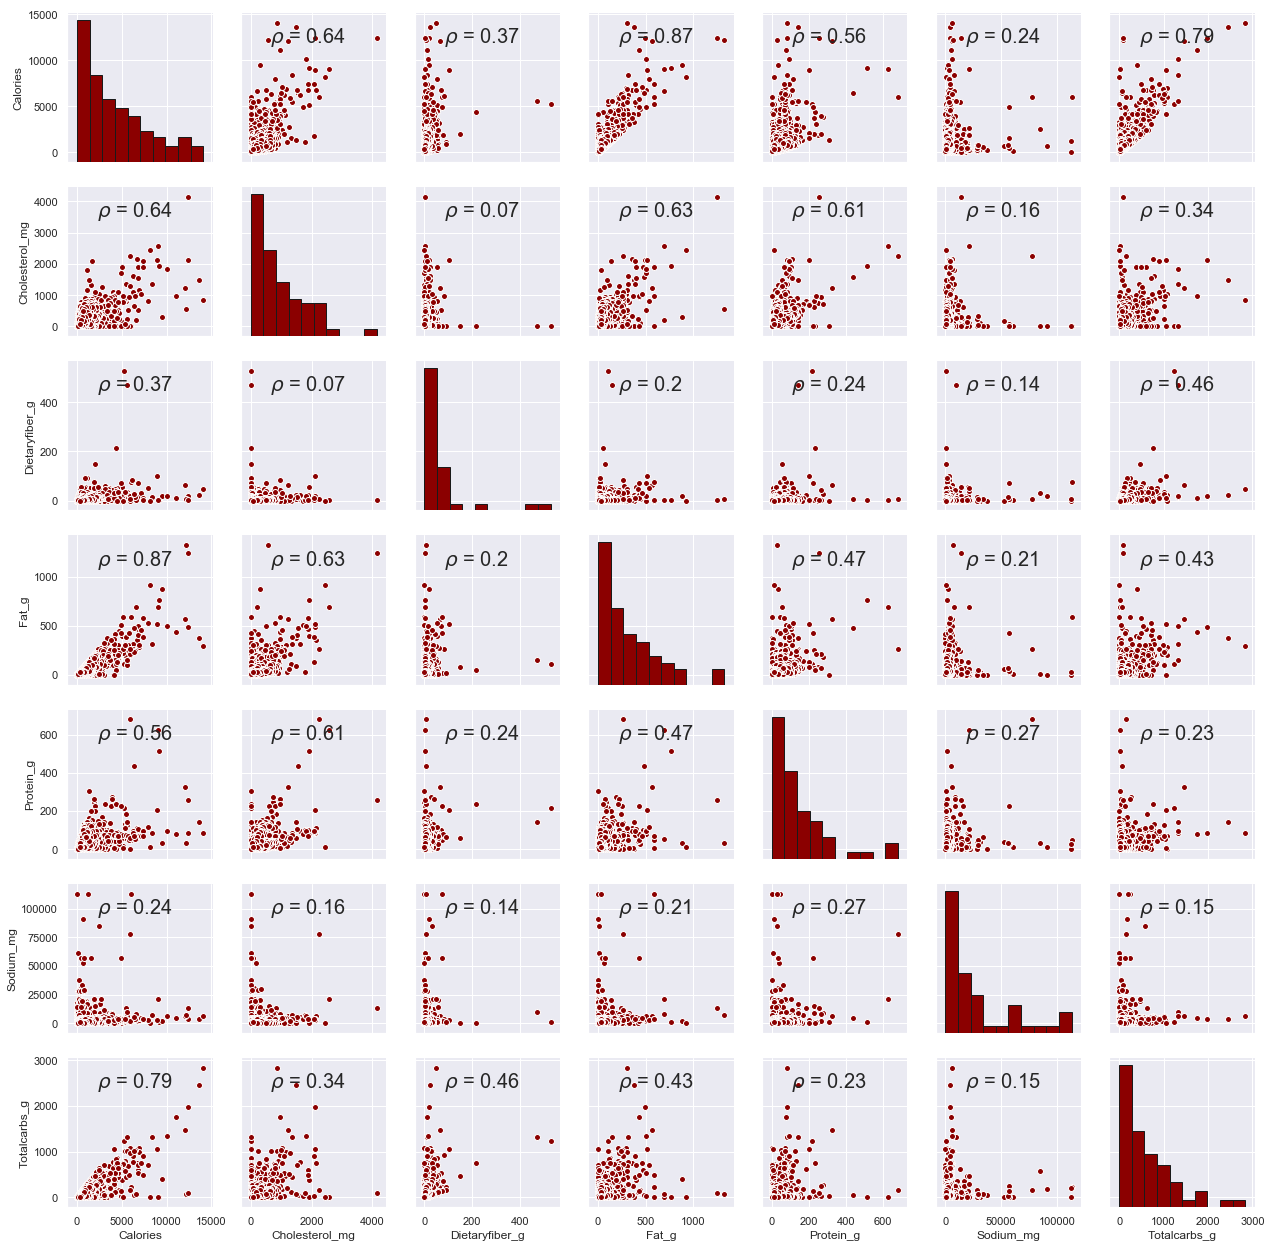

In [56]:
# sns.pairplot(nutrients.dropna())
def corr(x, y, **kwargs):
    # Calculate Pearson Corr
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.8), size = 20, xycoords = ax.transAxes)
# Create a pair grid instance
grid = sns.PairGrid(data= nutrients.dropna())

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, edgecolors='white', color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_diag(plt.hist, log = True, bins = 10, edgecolor = 'k', color = 'darkred')
grid = grid.map_lower(plt.scatter, edgecolors='white', color = 'darkred')
grid = grid.map_lower(corr)

From the plot above we can explore the distibutions for all nutrients in the recipes and their correlation. We have very few recipes with extremly high values in the nutrients.  We will keep these recipes at the dataframes for now.

We can induce from the plot that a group of nutrients are almost linearly correlated and they are calories, totalcarbs, fat and cholesterol which actually makes sense. We have a couple of features which are correlated and follow a power law like cholesterol vs. sodium, fat vs. sodium etc. We will use this information when we connect the recipe data with the WHO data to explore correlation on health and recipes nutrients. 

# Part 3 What's next


## 3.1 Ingredient pairs

## 3.2 Regional Differences